# This is fruit classification project implementation #2

**Part1: Reading Data**

In [1]:
import cv2
import glob
import os
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import random
import math
import tensorflow as tf

Using TensorFlow backend.


In [2]:
os.chdir("../input/")
!ls *

fruits:
fruits-360_dataset

realtestdata:
real-data


In [3]:
train_data_dir = '../input/fruits/fruits-360_dataset/fruits-360/Training/'
test_data_dir = '../input/fruits/fruits-360_dataset/fruits-360/Test/'

In [4]:
def read_and_preprocess_img(image_path,img_color,img_size):
    image = cv2.imread(image_path,cv2.IMREAD_COLOR)
    if(img_color == "RGB"):
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    elif(img_color == "Gray"):
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    imResize = cv2.resize(image, dsize=img_size) 
    return imResize.astype("float32")/255

In [5]:
def read_data(path,img_color,img_size):
    data_fruit_img = []
    data_label = []
    for dir_path in glob.glob(path+"/*"):
        img_label = dir_path.split("/")[-1]
        for image_path in glob.glob(os.path.join(dir_path,"*.jpg")):
            image = read_and_preprocess_img(image_path,img_color,img_size)
            data_fruit_img.append(image)
            data_label.append(img_label)
    return (np.array(data_fruit_img),np.array(data_label))

In [6]:
# Read Training data
X_train,train_label = read_data(train_data_dir,"RGB",(100,100))
print(X_train.shape)
print(train_label.shape)

(41322, 100, 100, 3)
(41322,)


In [7]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    validation_split = .25
)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (100,100),
    #batch_size=batch_size_train,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (100,100),
    #batch_size=batch_size_valid,#default is 32
    class_mode='categorical',
    subset='validation'
)
test_generator = test_datagen.flow_from_directory(
    directory=test_data_dir,
    target_size=(100, 100),
    batch_size=1,
    shuffle = False,
)

Found 31018 images belonging to 81 classes.
Found 10304 images belonging to 81 classes.
Found 13877 images belonging to 81 classes.


In [8]:
training_data = pd.DataFrame(train_generator.classes, columns=['classes'])

In [9]:
def create_stack_bar_data(col, df):
    aggregated = df[col].value_counts().sort_index()
    x_values = aggregated.index.tolist()
    y_values = aggregated.values.tolist()
    return x_values, y_values

In [10]:
x1, y1 = create_stack_bar_data('classes', training_data)
x1 = list(train_generator.class_indices.keys())

In [11]:
x1

['Apple Braeburn',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Red',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Clementine',
 'Cocos',
 'Dates',
 'Granadilla',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'Mandarine',
 'Mango',
 'Maracuja',
 'Melon Piel de Sapo',
 'Mulberry',
 'Nectarine',
 'Orange',
 'Papaya',
 'Passion Fruit',
 'Peach',
 'Peach Flat',
 'Pear',
 'Pear Abate',
 'Pear Monster',
 'Pear Williams',
 'Pepino',
 'Physalis',
 'Physalis with Husk',
 'Pineapple',
 'Pineapple Mini',
 'Pitahaya Red',
 'Plum',
 'Pomegr

**Part2: Building Models**

In [12]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.optimizers import SGD

In [13]:
# first model that uses decaying learning rate
model_exp_decay = Sequential()
### TODO: Define your architecture.
model_exp_decay.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=train_generator.image_shape))
model_exp_decay.add(MaxPooling2D(pool_size=2))
model_exp_decay.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model_exp_decay.add(MaxPooling2D(pool_size=2))
model_exp_decay.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model_exp_decay.add(MaxPooling2D(pool_size=2))
model_exp_decay.add(GlobalAveragePooling2D())
model_exp_decay.add(Dense(81, activation='softmax'))
        
model_exp_decay.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 16)      208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 49, 49, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 64)                0         
__________

In [44]:
# second model that uses droping learning rate
model_drop_decay = Sequential()
### TODO: Define your architecture.
model_drop_decay.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=train_generator.image_shape))
model_drop_decay.add(MaxPooling2D(pool_size=2))
model_drop_decay.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model_drop_decay.add(MaxPooling2D(pool_size=2))
model_drop_decay.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model_drop_decay.add(MaxPooling2D(pool_size=2))
model_drop_decay.add(GlobalAveragePooling2D())
model_drop_decay.add(Dense(81, activation='softmax'))

model_drop_decay.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 100, 100, 16)      208       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 49, 49, 32)        2080      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 23, 23, 64)        8256      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
global_average_pooling2d_5 ( (None, 64)                0         
__________

In [15]:
# third model that uses adam optimizer instead of SGD
model_adam = Sequential()
### TODO: Define your architecture.
model_adam.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=train_generator.image_shape))
model_adam.add(MaxPooling2D(pool_size=2))
model_adam.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model_adam.add(MaxPooling2D(pool_size=2))
model_adam.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model_adam.add(MaxPooling2D(pool_size=2))
model_adam.add(GlobalAveragePooling2D())
model_adam.add(Dense(81, activation='softmax'))
        
model_adam.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 100, 100, 16)      208       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 49, 49, 32)        2080      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 23, 23, 64)        8256      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
global_average_pooling2d_3 ( (None, 64)                0         
__________

In [16]:
epochs = 50

In [17]:
#method 1
learning_rate1 = 0.1
decay_rate1 = learning_rate1 / epochs
momentum1 = 0.8

In [43]:
#method 2

# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5 # decay = .5 
    epochs_drop = 7.0 # drop LR value each 7 epochs
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop)) # tranformation function
    return lrate

learning_rate2 = 0.0 # these values is put but not used actually
decay_rate2 = 0.0 # these values is put but not used actually
momentum2 = .9

In [19]:
model_exp_decay.compile(loss='categorical_crossentropy', optimizer=SGD(lr=learning_rate1, momentum=momentum1, decay=decay_rate1, nesterov=False), metrics=['accuracy'])

In [45]:
model_drop_decay.compile(loss='categorical_crossentropy', optimizer=SGD(lr=learning_rate2, momentum=momentum2, decay=decay_rate2, nesterov=False), metrics=['accuracy'])

In [21]:
model_adam.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
from os.path import join, exists, expanduser
models_dir = expanduser(join('~', 'saved_models'))
if not exists(models_dir):
    os.makedirs(models_dir)

In [23]:
!ls ~

saved_models


In [24]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,LearningRateScheduler

#Early stopping
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, patience=4)

In [25]:
### TODO: specify the number of epochs that you would like to use to train the model.
checkpointer = ModelCheckpoint(filepath='/tmp/saved_models/weights.best.tuned_cnn_exp_decay.hdf5', 
                               verbose=1, save_best_only=True)

history_exp_decay = model_exp_decay.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=epochs,
        callbacks=[checkpointer,early_stopping],
        verbose=1,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // validation_generator.batch_size)

Epoch 1/50
969/969 [==============================] - 72s 75ms/step - loss: 1.8259 - acc: 0.4950 - val_loss: 0.5582 - val_acc: 0.8408

Epoch 00001: val_loss improved from inf to 0.55823, saving model to /tmp/saved_models/weights.best.tuned_cnn_exp_decay.hdf5
Epoch 2/50
969/969 [==============================] - 75s 78ms/step - loss: 0.2437 - acc: 0.9261 - val_loss: 0.2140 - val_acc: 0.9244

Epoch 00002: val_loss improved from 0.55823 to 0.21405, saving model to /tmp/saved_models/weights.best.tuned_cnn_exp_decay.hdf5
Epoch 3/50
969/969 [==============================] - 73s 75ms/step - loss: 0.1052 - acc: 0.9652 - val_loss: 0.2675 - val_acc: 0.9208

Epoch 00003: val_loss did not improve from 0.21405
Epoch 4/50
969/969 [==============================] - 74s 76ms/step - loss: 0.0645 - acc: 0.9782 - val_loss: 0.1592 - val_acc: 0.9490

Epoch 00004: val_loss improved from 0.21405 to 0.15925, saving model to /tmp/saved_models/weights.best.tuned_cnn_exp_decay.hdf5
Epoch 5/50
969/969 [=========

In [46]:
### TODO: specify the number of epochs that you would like to use to train the model.
checkpointer = ModelCheckpoint(filepath='/tmp/saved_models/weights.best.tuned_cnn_drop_decay.hdf5', 
                               verbose=1, save_best_only=True)
lrate = LearningRateScheduler(step_decay)

history_drop_decay = model_drop_decay.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=epochs,
        callbacks=[checkpointer,early_stopping,lrate],
        verbose=1,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // validation_generator.batch_size)

Epoch 1/50
969/969 [==============================] - 50s 52ms/step - loss: 2.2403 - acc: 0.3814 - val_loss: 1.2061 - val_acc: 0.6428

Epoch 00001: val_loss improved from inf to 1.20606, saving model to /tmp/saved_models/weights.best.tuned_cnn_drop_decay.hdf5
Epoch 2/50
969/969 [==============================] - 59s 61ms/step - loss: 0.7499 - acc: 0.7670 - val_loss: 0.7266 - val_acc: 0.7701

Epoch 00002: val_loss improved from 1.20606 to 0.72661, saving model to /tmp/saved_models/weights.best.tuned_cnn_drop_decay.hdf5
Epoch 3/50
969/969 [==============================] - 56s 58ms/step - loss: 0.5370 - acc: 0.8552 - val_loss: 1.2762 - val_acc: 0.7204

Epoch 00003: val_loss did not improve from 0.72661
Epoch 4/50
969/969 [==============================] - 47s 49ms/step - loss: 0.4745 - acc: 0.8808 - val_loss: 0.6448 - val_acc: 0.8378

Epoch 00004: val_loss improved from 0.72661 to 0.64475, saving model to /tmp/saved_models/weights.best.tuned_cnn_drop_decay.hdf5
Epoch 5/50
969/969 [======

In [27]:
### TODO: specify the number of epochs that you would like to use to train the model.
checkpointer = ModelCheckpoint(filepath='/tmp/saved_models/weights.best.tuned_cnn_adam.hdf5', 
                               verbose=1, save_best_only=True)

history_adam = model_adam.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=epochs,
        callbacks=[checkpointer,early_stopping],
        verbose=1,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // validation_generator.batch_size)

Epoch 1/50
969/969 [==============================] - 48s 50ms/step - loss: 2.0558 - acc: 0.4119 - val_loss: 1.2866 - val_acc: 0.6726

Epoch 00001: val_loss improved from inf to 1.28664, saving model to /tmp/saved_models/weights.best.tuned_cnn_adam.hdf5
Epoch 2/50
969/969 [==============================] - 47s 49ms/step - loss: 0.8583 - acc: 0.7345 - val_loss: 0.8363 - val_acc: 0.7622

Epoch 00002: val_loss improved from 1.28664 to 0.83631, saving model to /tmp/saved_models/weights.best.tuned_cnn_adam.hdf5
Epoch 3/50
969/969 [==============================] - 49s 50ms/step - loss: 0.5068 - acc: 0.8452 - val_loss: 0.6955 - val_acc: 0.7915

Epoch 00003: val_loss improved from 0.83631 to 0.69548, saving model to /tmp/saved_models/weights.best.tuned_cnn_adam.hdf5
Epoch 4/50
969/969 [==============================] - 47s 49ms/step - loss: 0.3432 - acc: 0.8914 - val_loss: 0.5025 - val_acc: 0.8624

Epoch 00004: val_loss improved from 0.69548 to 0.50253, saving model to /tmp/saved_models/weigh

In [28]:
model_exp_decay.load_weights("/tmp/saved_models/weights.best.tuned_cnn_exp_decay.hdf5")

In [47]:
model_drop_decay.load_weights("/tmp/saved_models/weights.best.tuned_cnn_drop_decay.hdf5")

In [30]:
model_adam.load_weights("/tmp/saved_models/weights.best.tuned_cnn_adam.hdf5")

In [31]:
model_exp_decay.evaluate_generator(test_generator, test_generator.samples)

[0.13065101978553254, 0.9690855372198602]

In [48]:
model_drop_decay.evaluate_generator(test_generator, test_generator.samples)

[0.11713897851970824, 0.9621676154788499]

In [33]:
model_adam.evaluate_generator(test_generator, test_generator.samples)

[0.20386002428693534, 0.9517186711825323]

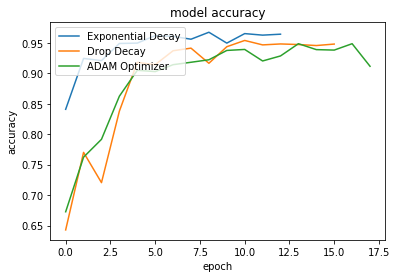

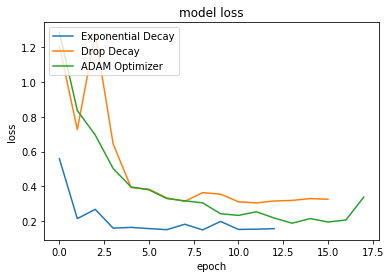

In [49]:
# summarize history for accuracy
plt.plot(history_exp_decay.history['val_acc'])
plt.plot(history_drop_decay.history['val_acc'])
plt.plot(history_adam.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Exponential Decay', 'Drop Decay','ADAM Optimizer'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_exp_decay.history['val_loss'])
plt.plot(history_drop_decay.history['val_loss'])
plt.plot(history_adam.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Exponential Decay', 'Drop Decay', 'ADAM Optimizer'], loc='upper left')
plt.show()

**Part 3: test on real test set**

In [35]:
def get_specific_class_img (class_name):
    root_directory = '../input/fruits/fruits-360_dataset/fruits-360/Training/'+ class_name + '/'
    img_path = glob.glob(os.path.join(root_directory,"*.jpg"))[0]
    return read_and_preprocess_img(img_path,"RGB",(100,100))

In [36]:
def model_predict(img,model_num):
    # obtain predicted vector
    if(model_num == "1"):
        predicted_vector = model_exp_decay.predict(img)
    elif(model_num == "2"):
        predicted_vector = model_drop_decay.predict(img)
    else:
        predicted_vector = model_adam.predict(img)
    # return fruit class that is predicted by the model
    return x1[np.argmax(predicted_vector)]

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


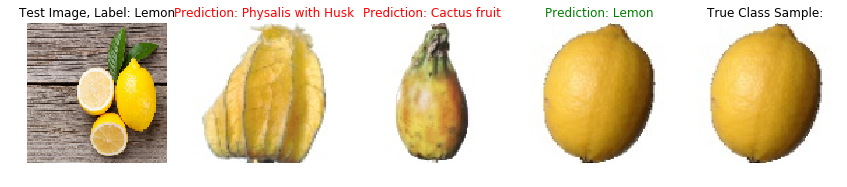

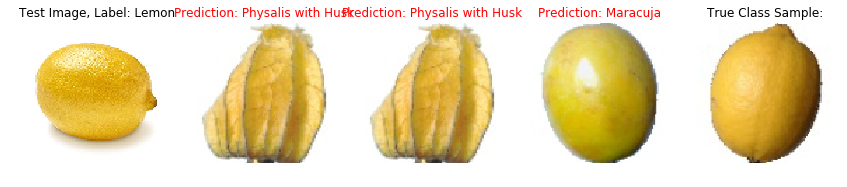

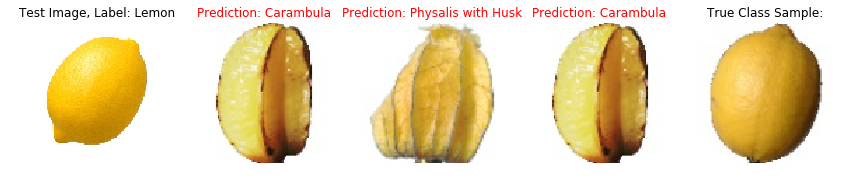

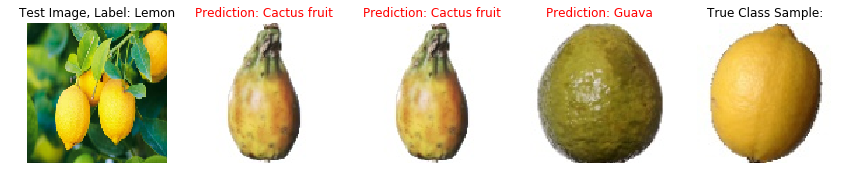

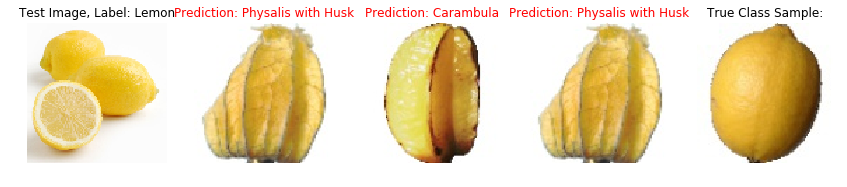

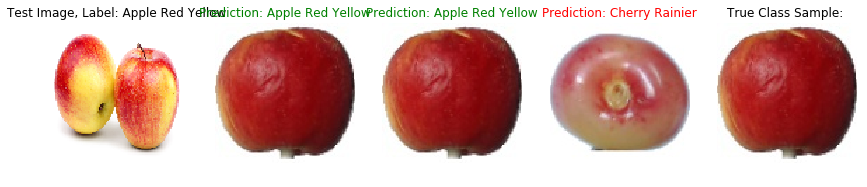

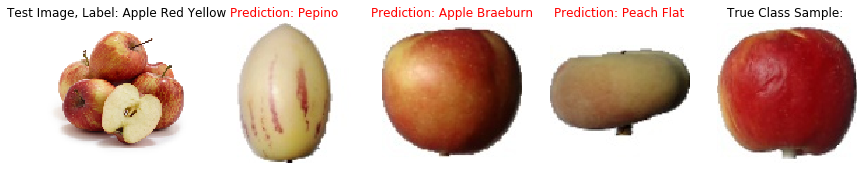

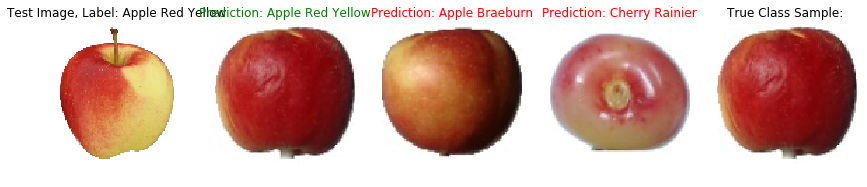

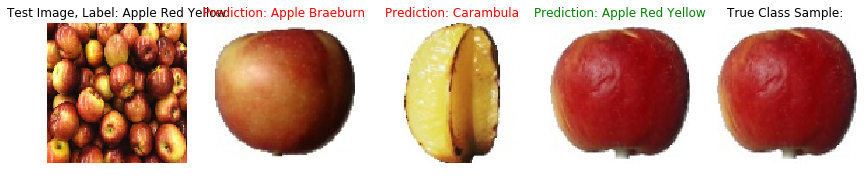

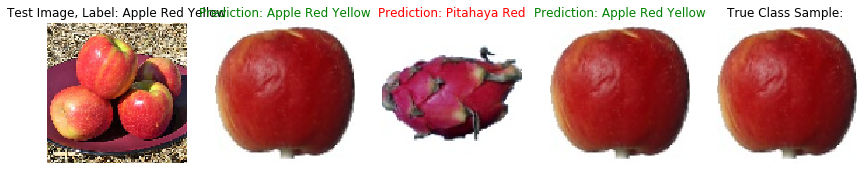

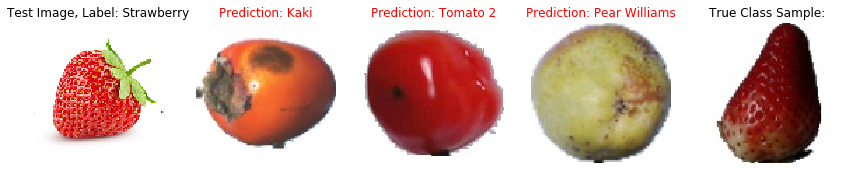

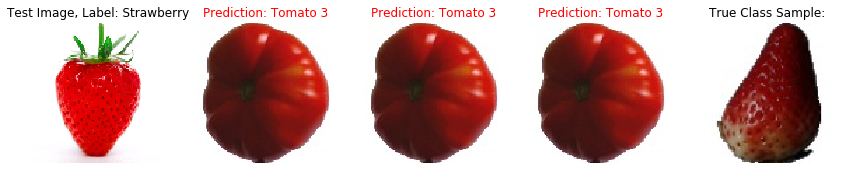

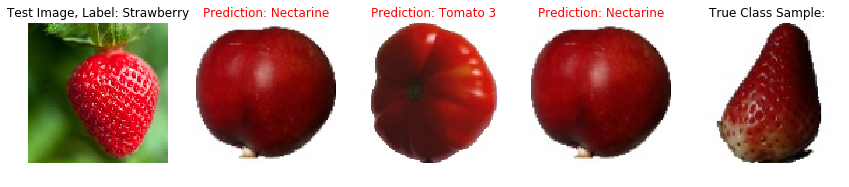

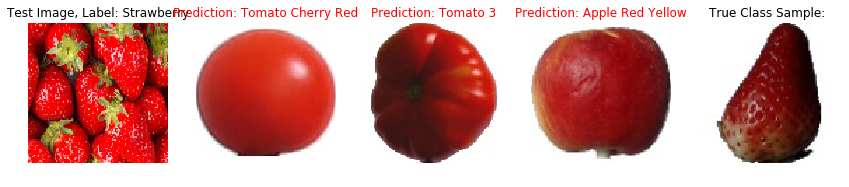

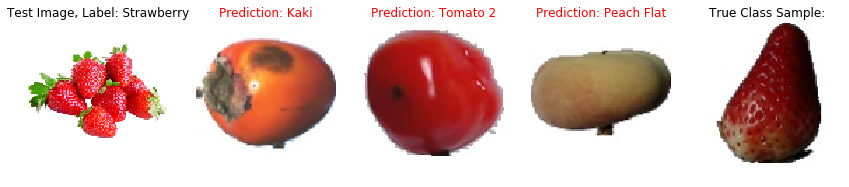

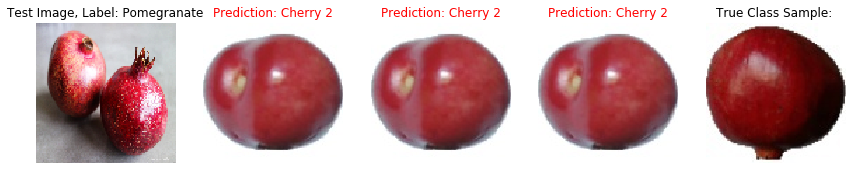

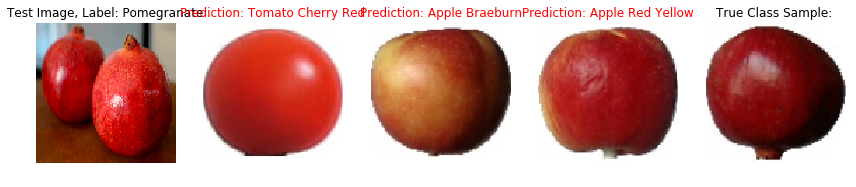

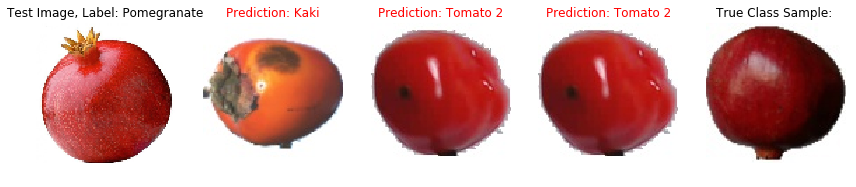

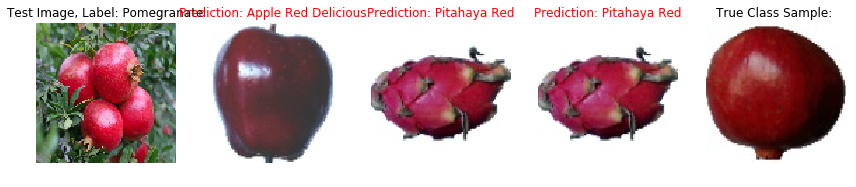

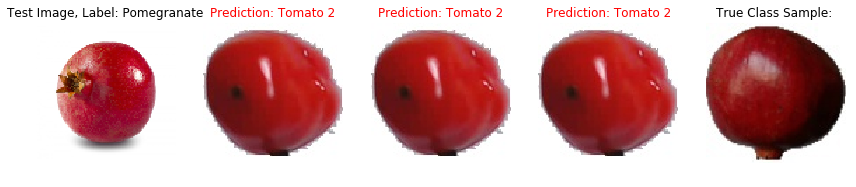

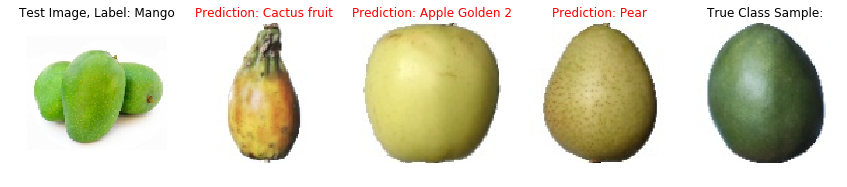

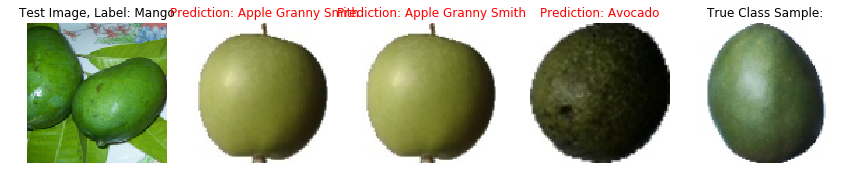

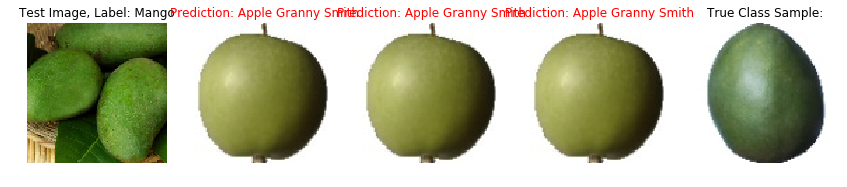

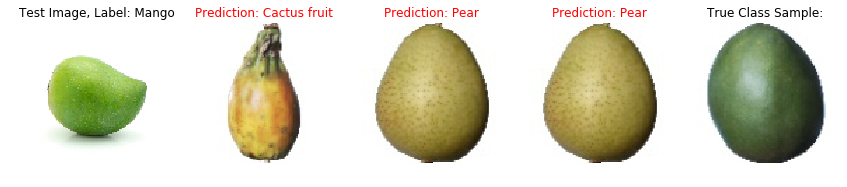

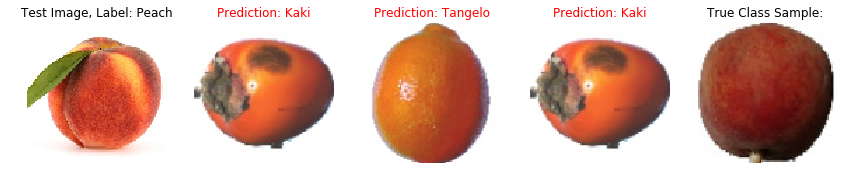

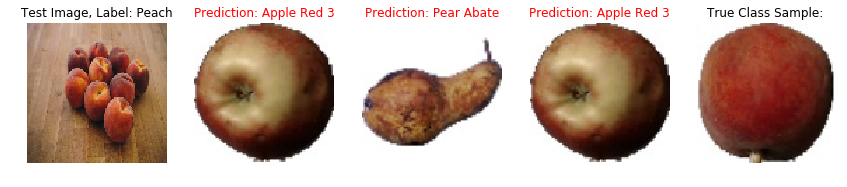

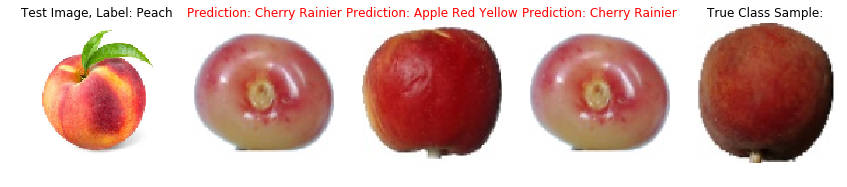

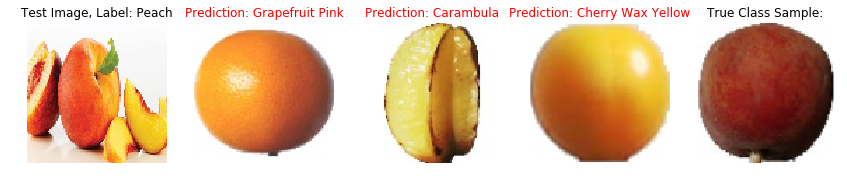

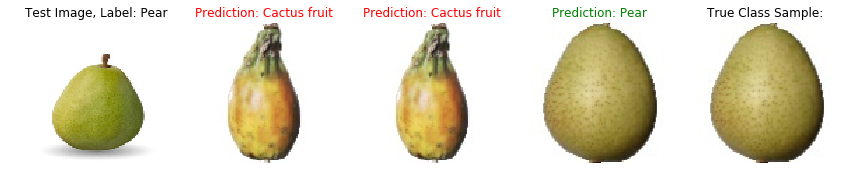

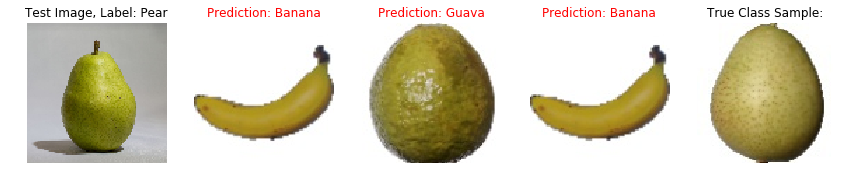

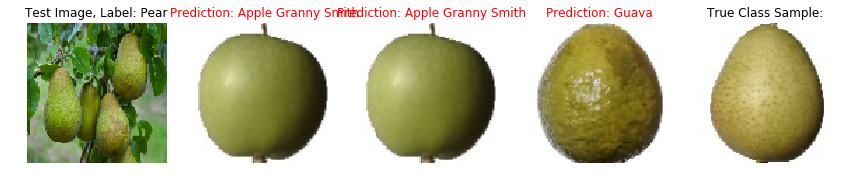

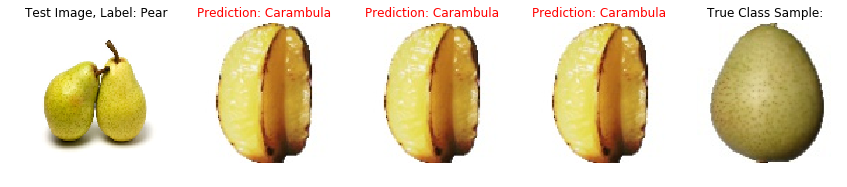

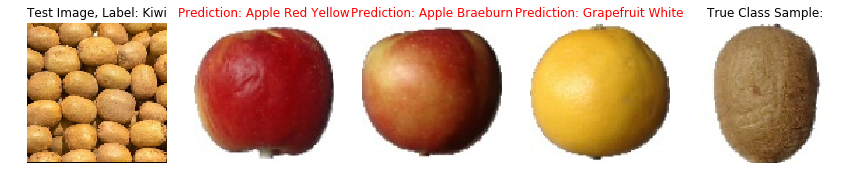

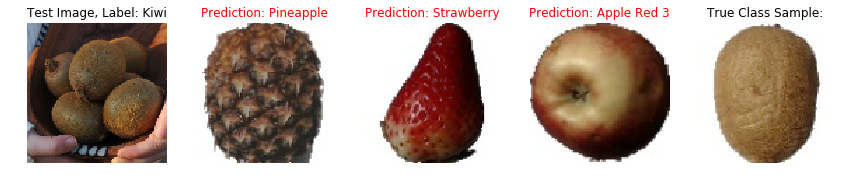

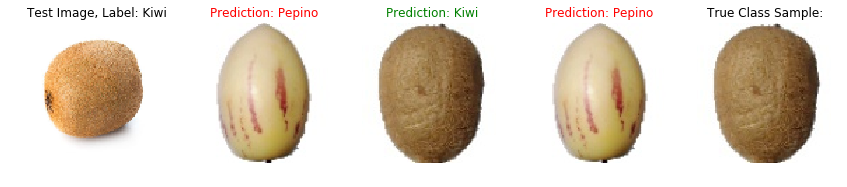

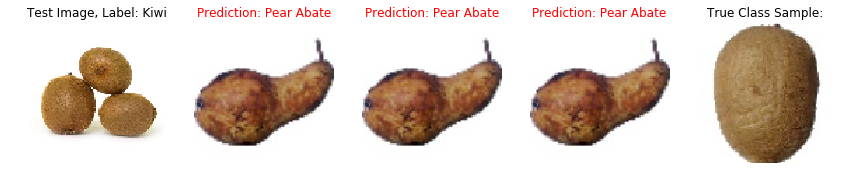

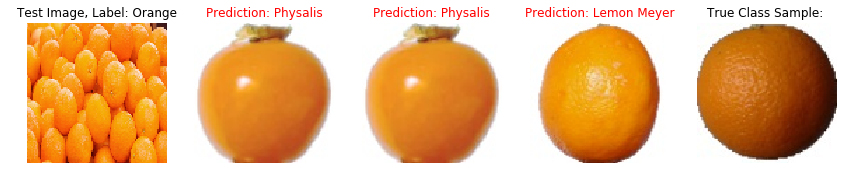

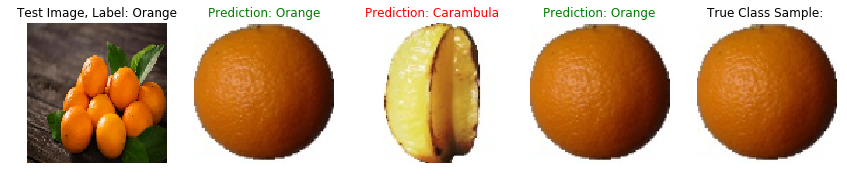

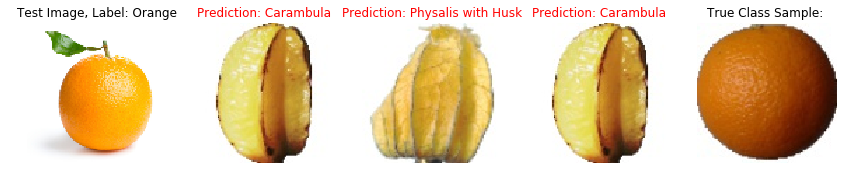

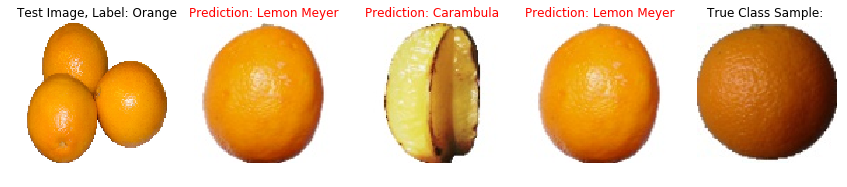

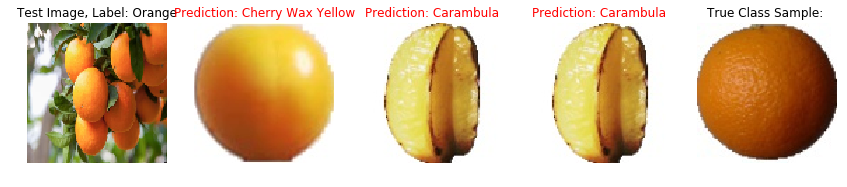

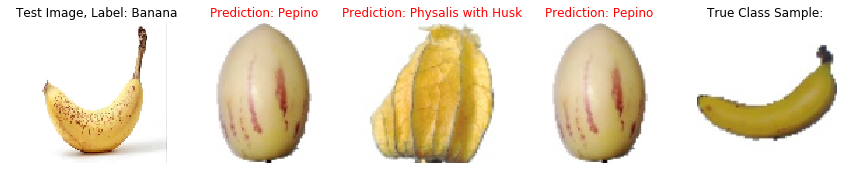

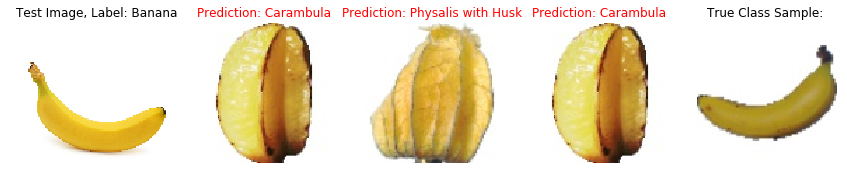

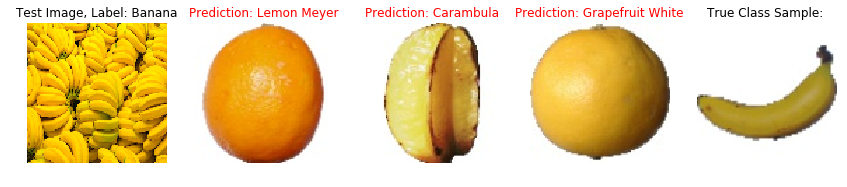

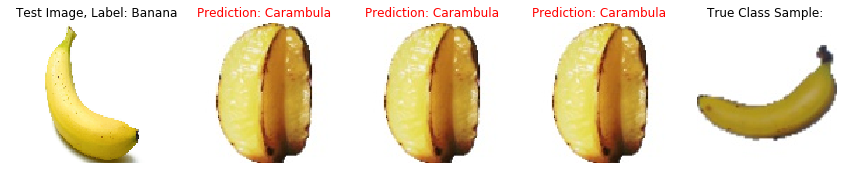

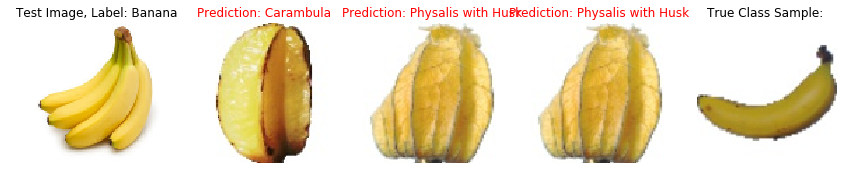

In [53]:
unseen_test_data_dir = '../input/realtestdata/real-data/Capstone Data/'
right_pred1 = 0
right_pred2 = 0
right_pred3 = 0
#unseen_test_data_dir = '../input/fruits/fruits-360_dataset/fruits-360/Test/'
X_real_test,test_label = read_data(unseen_test_data_dir,"RGB",(100,100))
for i,img in enumerate(X_real_test):
    pred_class_name1 = model_predict(np.expand_dims(img, axis=0),"1")
    pred_class_name2 = model_predict(np.expand_dims(img, axis=0),"2")
    pred_class_name3 = model_predict(np.expand_dims(img, axis=0),"3")
    true_label = test_label[i]
    pred_right1 = (true_label == pred_class_name1)
    pred_right2 = (true_label == pred_class_name2)
    pred_right3 = (true_label == pred_class_name3)

    if pred_right1:
        right_pred1 += 1
    if pred_right2:
        right_pred2 += 1
    if pred_right3:
        right_pred3 += 1
    f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5)
    plt.subplots_adjust(bottom=0.1, right=2, top=0.9)
    ax1.imshow(img)
    ax1.set_axis_off()    
    ax1.set_title('Test Image, Label: '+ true_label)
    ax2.imshow(get_specific_class_img(pred_class_name1))
    ax2.set_axis_off()
    ax2.set_title('Prediction: '+ pred_class_name1,color=("green" if pred_right1 else "red"))
    ax3.imshow(get_specific_class_img(pred_class_name2))
    ax3.set_axis_off()
    ax3.set_title('Prediction: '+ pred_class_name2,color=("green" if pred_right2 else "red"))
    ax4.imshow(get_specific_class_img(pred_class_name3))
    ax4.set_axis_off()
    ax4.set_title('Prediction: '+ pred_class_name3,color=("green" if pred_right3 else "red"))
    ax5.imshow(get_specific_class_img(true_label))
    ax5.set_axis_off()
    ax5.set_title('True Class Sample: ')

In [54]:
print("Model 1 predicted {} images right,accuracy = {}%".format(right_pred1,(right_pred1*100./50)))
print("Model 2 predicted {} images right,accuracy = {}%".format(right_pred2,(right_pred2*100./50)))
print("Model 3 predicted {} images right,accuracy = {}%".format(right_pred3,(right_pred3*100./50)))

Model 1 predicted 4 images right,accuracy = 8.0%
Model 2 predicted 2 images right,accuracy = 4.0%
Model 3 predicted 5 images right,accuracy = 10.0%
